In [6]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Add project root to system path to allow importing modules
sys.path.append(os.path.abspath('..'))

from backtest.engine import BacktestEngine

In [7]:
# Load the prepared datasets
df = pd.read_parquet('../data/final_dataset.parquet')
bench_df = pd.read_parquet('../data/benchmark_csi300_monthly.parquet')

print(f"Data Loaded. Shape: {df.shape}")

Data Loaded. Shape: (381568, 34)


In [8]:
FACTOR_NAME = 'FARatio'  # This will be replaced by the script
print(f"Analyzing Factor: {FACTOR_NAME}")

# Initialize Engine with Benchmark
engine = BacktestEngine(df, factor_name=FACTOR_NAME, benchmark_df=bench_df)

Analyzing Factor: FARatio


In [9]:
# Run analysis using Value-Weighted sorting (Academic Standard)
summary = engine.run_analysis(weighting='vw')

# Display Key Metrics
print("Performance Summary:")
for k, v in summary.items():
    print(f"{k}: {v:.4f}")

正在运行因子分析：FARatio...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/nachuanchen/Documents/

Performance Summary:
IC均值: 0.0197
IC_IR: 0.0982
因子自相关性: 0.8381
多空年化收益: -0.0704
多空夏普比率: 0.1209
FM回归t值: 0.5076
Q5年化收益: 0.0952
Q5夏普比率: 0.3333
Q5最大回撤: -0.9107
Q5换手率: 0.4983
Q5超额收益: -0.0403
Alpha: 0.0008
Beta: 0.0008


/Users/nachuanchen/Documents/Undergrad_Resources/资产管理与投资策略分析/AMQI/backtest/metrics.py:104: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return results.tvalues[0]
/Users/nachuanchen/Documents/Undergrad_Resources/资产管理与投资策略分析/AMQI/backtest/analyzer.py:224: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[0] # Slope


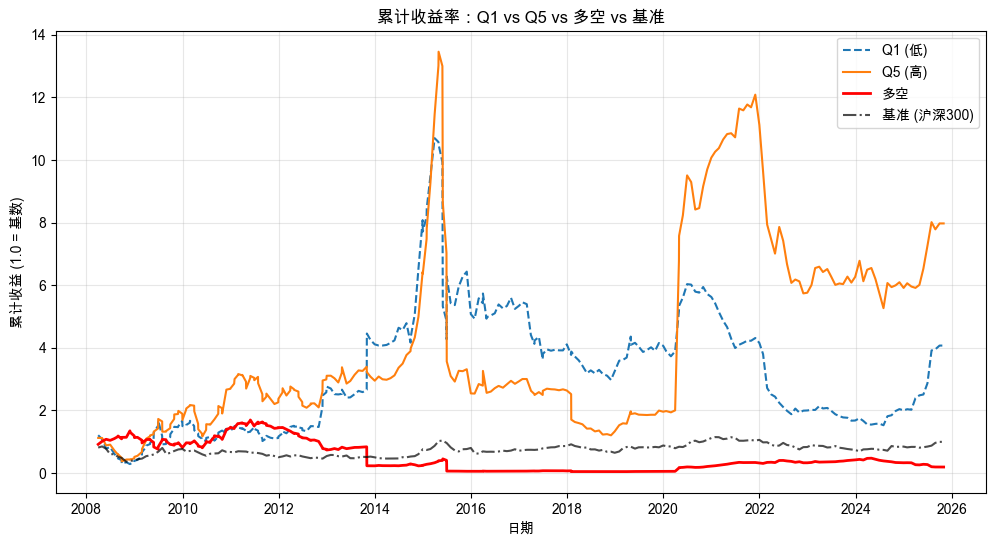

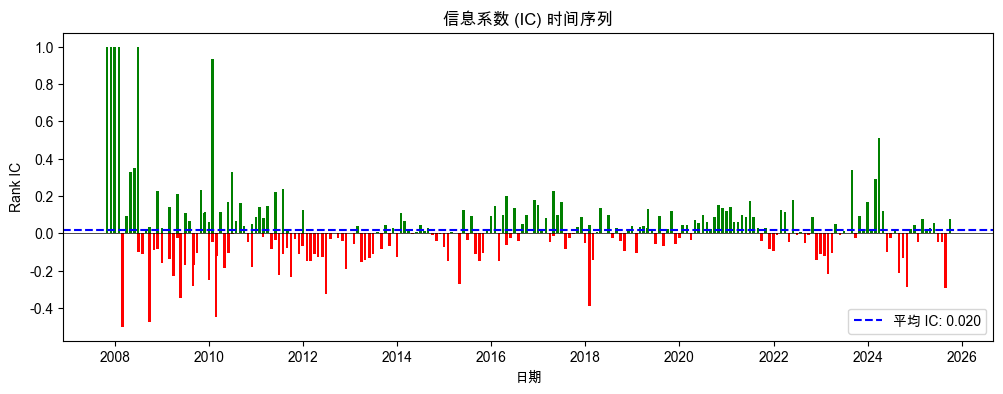

/Users/nachuanchen/Documents/Undergrad_Resources/资产管理与投资策略分析/AMQI/backtest/plotting.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ann_rets.index, y=ann_rets.values, palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either p

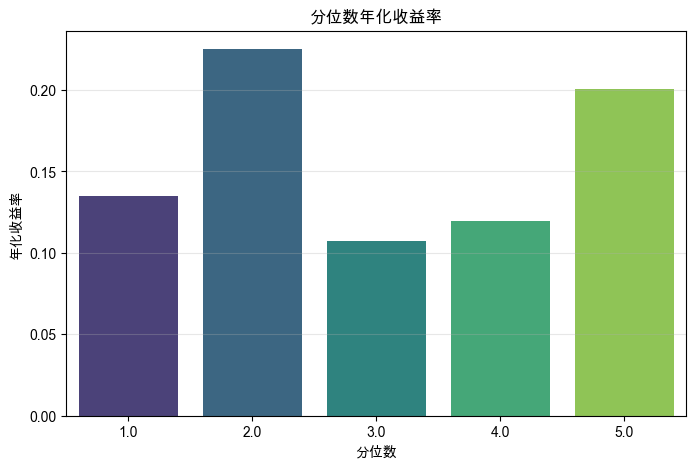

In [10]:
# Plot cumulative returns and IC series
engine.plot_results()
plt.show()